In [1]:
#pip install -r requirements.txt

In [2]:
#pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
data_X = statlog_german_credit_data.data.features 
data_y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [5]:

# Define a dictionary to map the old attribute names to the new, descriptive names
column_mapping = {
    'Attribute1': 'Checking_Status',
    'Attribute2': 'Duration_Months',
    'Attribute3': 'Credit_History',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit_Amount',
    'Attribute6': 'Savings',
    'Attribute7': 'Employment_Duration',
    'Attribute8': 'Installment_Rate',
    'Attribute9': 'Personal_Status_Sex',
    'Attribute10': 'Other_Debtors',
    'Attribute11': 'Residence_Duration',
    'Attribute12': 'Property',
    'Attribute13': 'Age',
    'Attribute14': 'Other_Installment_Plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Existing_Credits_Count',
    'Attribute17': 'Job',
    'Attribute18': 'Dependents_Count',
    'Attribute19': 'Telephone',
    'Attribute20': 'Foreign_Worker'
}

data_X = data_X.copy()  # Create a true copy of the slice

# Rename the columns
data_X.rename(columns=column_mapping, inplace=True)


In [6]:
# Display the first few rows to verify the changes
display(data_X.head())

,Checking_Status,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings,Employment_Duration,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Duration,Property,Age,Other_Installment_Plans,Housing,Existing_Credits_Count,Job,Dependents_Count,Telephone,Foreign_Worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [7]:
# Check data types and get summary statistics for initial exploration
data_info = data_X.info()
data_describe = data_X.describe()

data_info, data_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Checking_Status          1000 non-null   object
 1   Duration_Months          1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Savings                  1000 non-null   object
 6   Employment_Duration      1000 non-null   object
 7   Installment_Rate         1000 non-null   int64 
 8   Personal_Status_Sex      1000 non-null   object
 9   Other_Debtors            1000 non-null   object
 10  Residence_Duration       1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other_Installment_Plans  1000 non-null   object
 14  Housing                  1000 non-null   

(None,
        Duration_Months  Credit_Amount  Installment_Rate  Residence_Duration  \
 count      1000.000000    1000.000000       1000.000000         1000.000000   
 mean         20.903000    3271.258000          2.973000            2.845000   
 std          12.058814    2822.736876          1.118715            1.103718   
 min           4.000000     250.000000          1.000000            1.000000   
 25%          12.000000    1365.500000          2.000000            2.000000   
 50%          18.000000    2319.500000          3.000000            3.000000   
 75%          24.000000    3972.250000          4.000000            4.000000   
 max          72.000000   18424.000000          4.000000            4.000000   
 
                Age  Existing_Credits_Count  Dependents_Count  
 count  1000.000000             1000.000000       1000.000000  
 mean     35.546000                1.407000          1.155000  
 std      11.375469                0.577654          0.362086  
 min      19.00

### Data Preprocessing

In [8]:
data_y.head()

,class
0,1
1,2
2,1
3,1
4,2


### Comprehensive EDA

**Class Distribution**

-------
First I'll look at the target variable dataset to check for any potential class imbalance present

/tmp/ipykernel_2428/257973091.py:9: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='class', data=data_y, ax=ax, hue='class', palette=custom_palette, legend='auto')


Text(0, 0.5, 'Count')

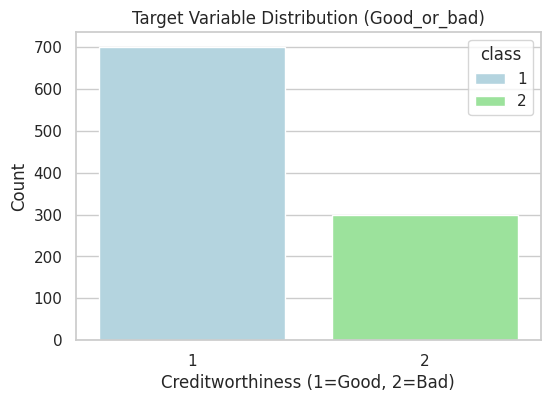

In [9]:
# Set up the plotting style
sns.set(style="whitegrid")

# Create a custom palette --- I just prefer these colurs
custom_palette = sns.color_palette(["#add8e6", "#90ee90", "#87cefa", "#98fb98", "#b0e0e6"])

# Step 1: Target variable distribution
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(x='class', data=data_y, ax=ax, hue='class', palette=custom_palette, legend='auto')
ax.set_title('Target Variable Distribution (Good_or_bad)')
ax.set_xlabel('Creditworthiness (1=Good, 2=Bad)')
ax.set_ylabel('Count')

- The Good_or_bad variable shows some imbalance, with more "1" (likely representing "good" credit risk) than "2" (likely "bad" credit risk). This imbalance may impact model performance and could require techniques like resampling if severe.

Text(0.5, 0.98, 'Numerical Feature Distributions')

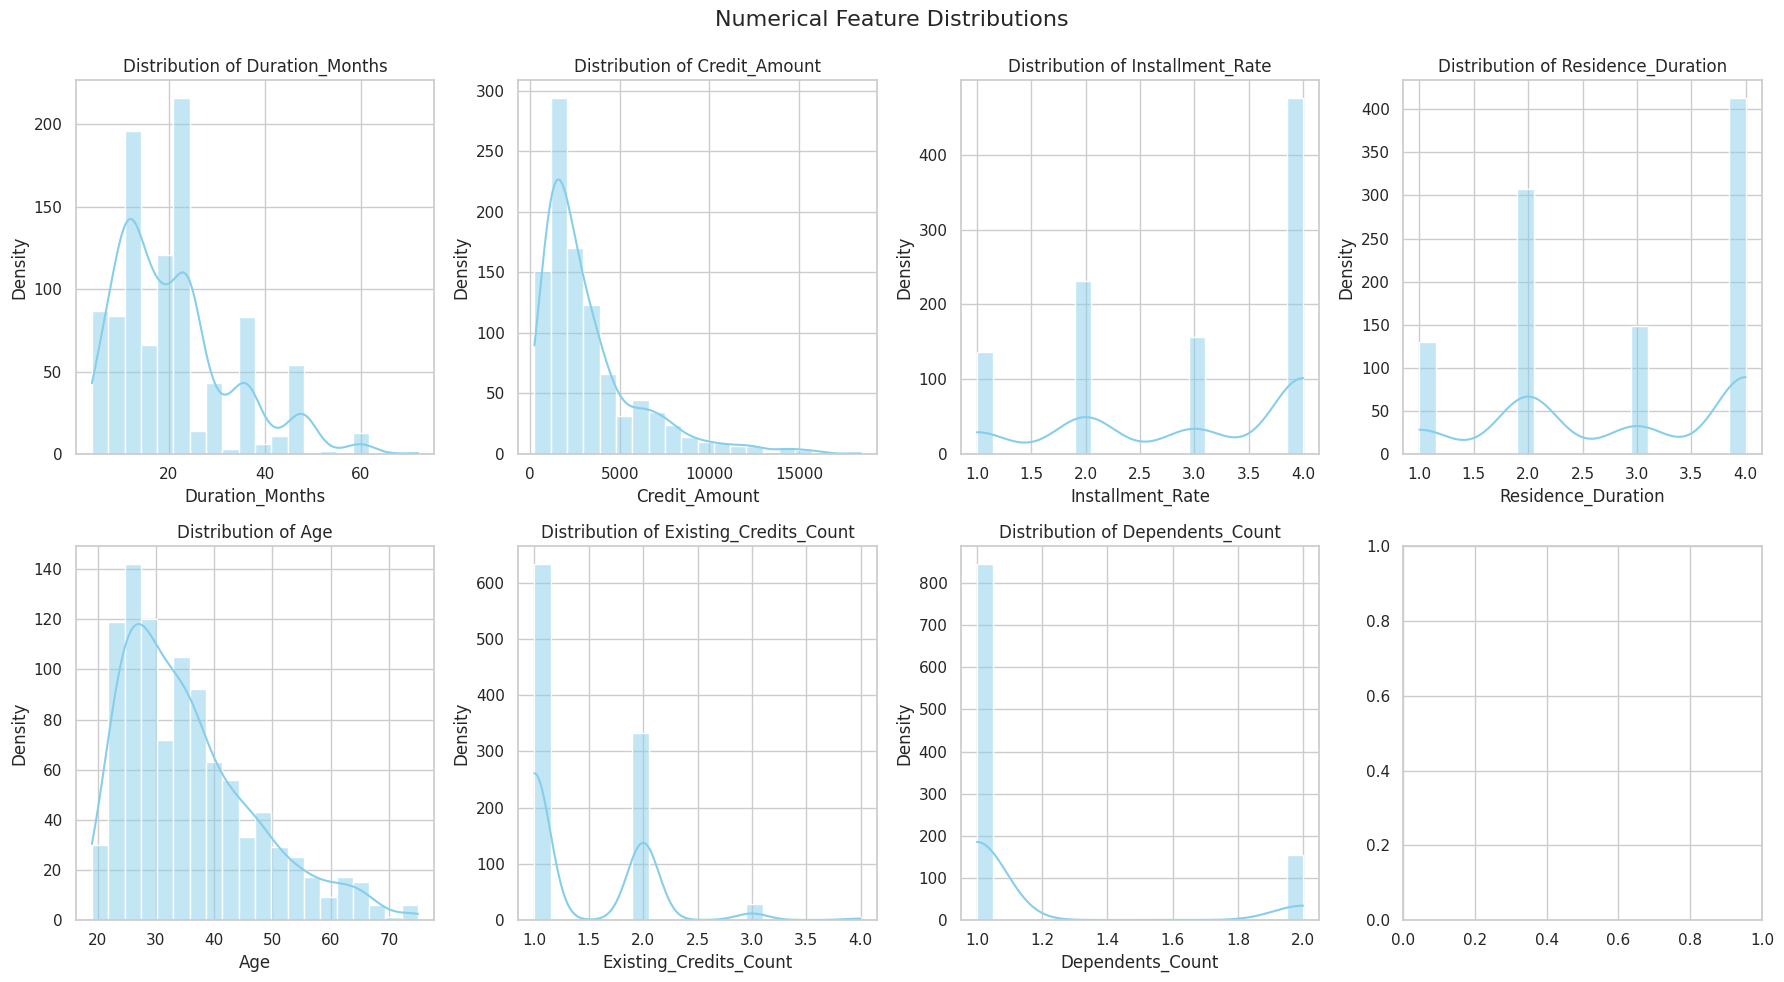

In [10]:
# Step 2: Distribution of numerical features

# Select numeric columns with int64 data type
numeric_columns = data_X.select_dtypes(include=['int64'])

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_columns):
    sns.histplot(data_X[feature], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Numerical Feature Distributions", fontsize=16)



- Most numerical features, such as `Duration_months`, `Credit_amount`, and `Age`, have a reasonable spread but some skewness, especially in `Credit_amount`.
Features like `Installment_rate` and `Dependents_Count` are more categorical in nature with limited unique values

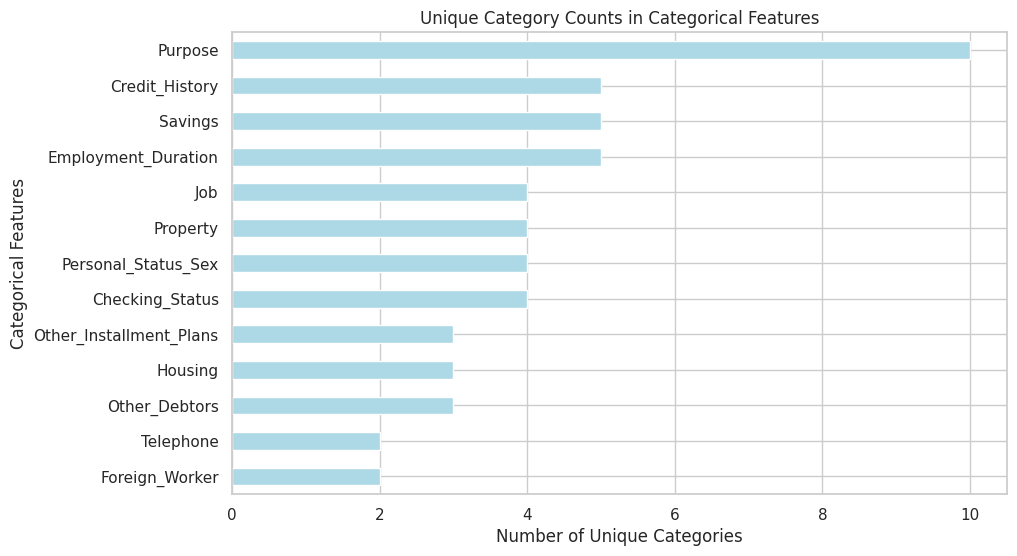

In [11]:
# Step 3: Unique counts in categorical features
categorical_features = data_X.select_dtypes(include='object').columns
category_counts = data_X[categorical_features].nunique().sort_values()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
category_counts.plot(kind='barh', color='#add8e6', ax=ax)
ax.set_title('Unique Category Counts in Categorical Features')
ax.set_xlabel('Number of Unique Categories')
ax.set_ylabel('Categorical Features')

plt.show()

- All categorical columns have varying levels of unique values, with some as low as two (e.g., Foreign_worker, Telephone). This insight will help us in choosing the right encoding methods.

In [12]:
# Perform bivariate analysis on categorical features with respect to the Credit_risk variable

# Dictionary to store the results of the analysis
bivariate_analysis_results = {}

# Perform bivariate analysis for each categorical feature
for feature in categorical_features:
    # Frequency and proportion analysis with respect to the target variable (Credit_risk)
    analysis = pd.crosstab(data_X[feature], data_y["class"], normalize='columns', margins=True) * 100
    bivariate_analysis_results[feature] = analysis

bivariate_analysis_results


{'Checking_Status': class                    1          2   All
 Checking_Status                            
 A11              19.857143  45.000000  27.4
 A12              23.428571  35.000000  26.9
 A13               7.000000   4.666667   6.3
 A14              49.714286  15.333333  39.4,
 'Credit_History': class                   1          2   All
 Credit_History                            
 A30              2.142857   8.333333   4.0
 A31              3.000000   9.333333   4.9
 A32             51.571429  56.333333  53.0
 A33              8.571429   9.333333   8.8
 A34             34.714286  16.666667  29.3,
 'Purpose': class            1          2   All
 Purpose                            
 A40      20.714286  29.666667  23.4
 A41      12.285714   5.666667  10.3
 A410      1.000000   1.666667   1.2
 A42      17.571429  19.333333  18.1
 A43      31.142857  20.666667  28.0
 A44       1.142857   1.333333   1.2
 A45       2.000000   2.666667   2.2
 A46       4.000000   7.333333   5.0
 A

/tmp/ipykernel_2428/2266144189.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2428/2266144189.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2428/2266144189.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2428/2266144189.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2428/2266144189.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2428/2266144189.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2428/2266144189.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not

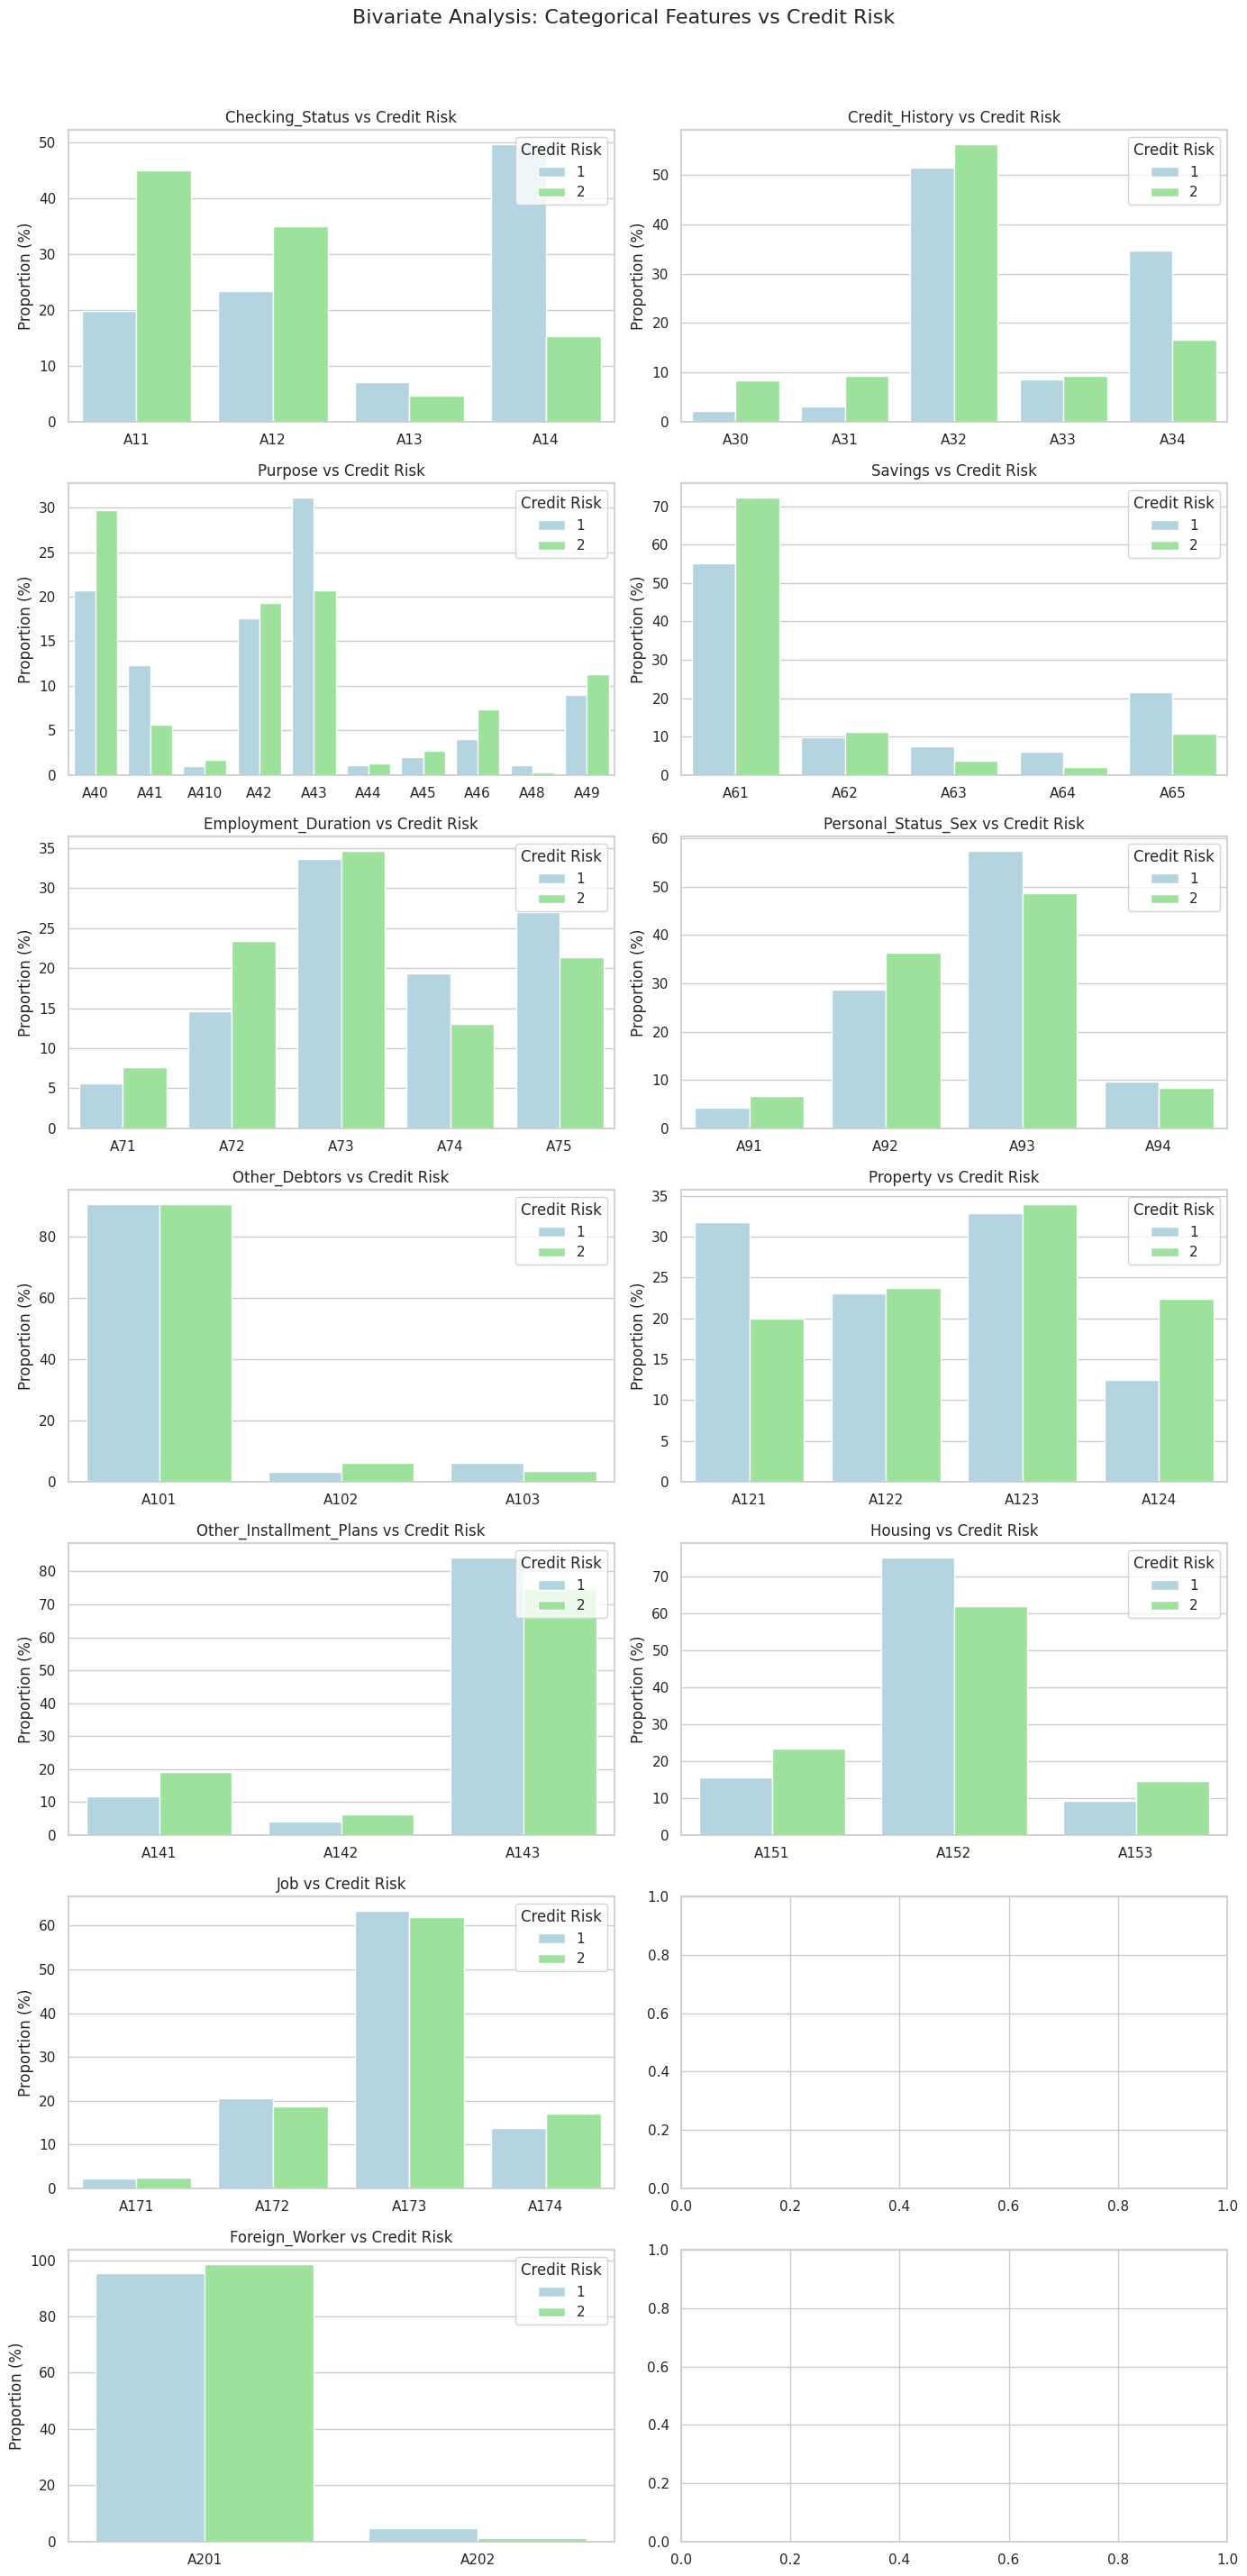

In [13]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))
fig.suptitle("Bivariate Analysis: Categorical Features vs Credit Risk", fontsize=16, y=1.02)

# Plot each categorical feature with respect to Credit_risk
for idx, (feature, analysis) in enumerate(bivariate_analysis_results.items()):
    # Skip 'Telephone' feature
    if feature == "Telephone":
        continue
    
    ax = axes[idx // 2, idx % 2]
    
    # Check for "All" row and column and remove if present
    if 'All' in analysis.index:
        analysis = analysis.drop("All", axis=0)
    if 'All' in analysis.columns:
        analysis = analysis.drop("All", axis=1)
    
    # Reset the index for melting
    analysis = analysis.reset_index()
    # Transform to long format for easy plotting
    analysis = analysis.melt(id_vars=feature, var_name="Credit_risk", value_name="Proportion")
    
    # Plot using seaborn
    sns.barplot(
        data=analysis, x=feature, y="Proportion", hue="Credit_risk", 
        palette=custom_palette, ax=ax
    )
    
    # Labeling for clarity
    ax.set_title(f"{feature} vs Credit Risk")
    ax.set_ylabel("Proportion (%)")
    ax.set_xlabel("")
    ax.legend(title="Credit Risk", loc="upper right")

plt.tight_layout()
plt.show()


**Status of Existing Checking Account:**

- Individuals with **"A11"** have a higher proportion of bad credit risk (45%) compared to good credit risk (19.9%).
**"A14"** shows a high proportion of good credit risk (49.7%) compared to bad (15.3%).

**Credit History:**

- **"A32"** is the most common credit history across both groups, though it's more common among those with bad credit risk (56.3%).
"A34" shows a much higher proportion in the good credit risk group (34.7%).

**Purpose:**

- Categories like **"A43"** (car-related) are more associated with good credit risk (31.1%), while "A40" (new car) has a higher proportion in the bad risk category (29.7%).

**Savings Account/Bonds:**

- Those with **"A61"** (little to no savings) are prevalent across both risk types, but more so in the bad credit risk group (72.3%).

**Employment Status:**

- **"A73"** (employed for 1–4 years) is the most common employment status in both groups, with a slightly higher proportion among those with bad credit risk.

**Personal Status/Sex:**

- **"A93"** (male, single) has a higher proportion among individuals with good credit risk (57.4%).

**Other Debtors/Guarantors:**

- Most individuals in both groups have no co-applicants or guarantors ("A101").

**Property:**

- Ownership of "A123" property type (unknown/none) is prevalent across both groups but more so in the bad credit risk group.

**Other Installment Plans:**

- **"A143"** (no other installment plans) is the most common among both risk types, slightly more among good credit risks.

/tmp/ipykernel_2428/3249117438.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="class", y=feature, palette="viridis", ax=axes[i])
/tmp/ipykernel_2428/3249117438.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="class", y=feature, palette="viridis", ax=axes[i])
/tmp/ipykernel_2428/3249117438.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="class", y=feature, palette="viridis", ax=axes[i])
/tmp/ipykernel_2428/3249117438.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is dep

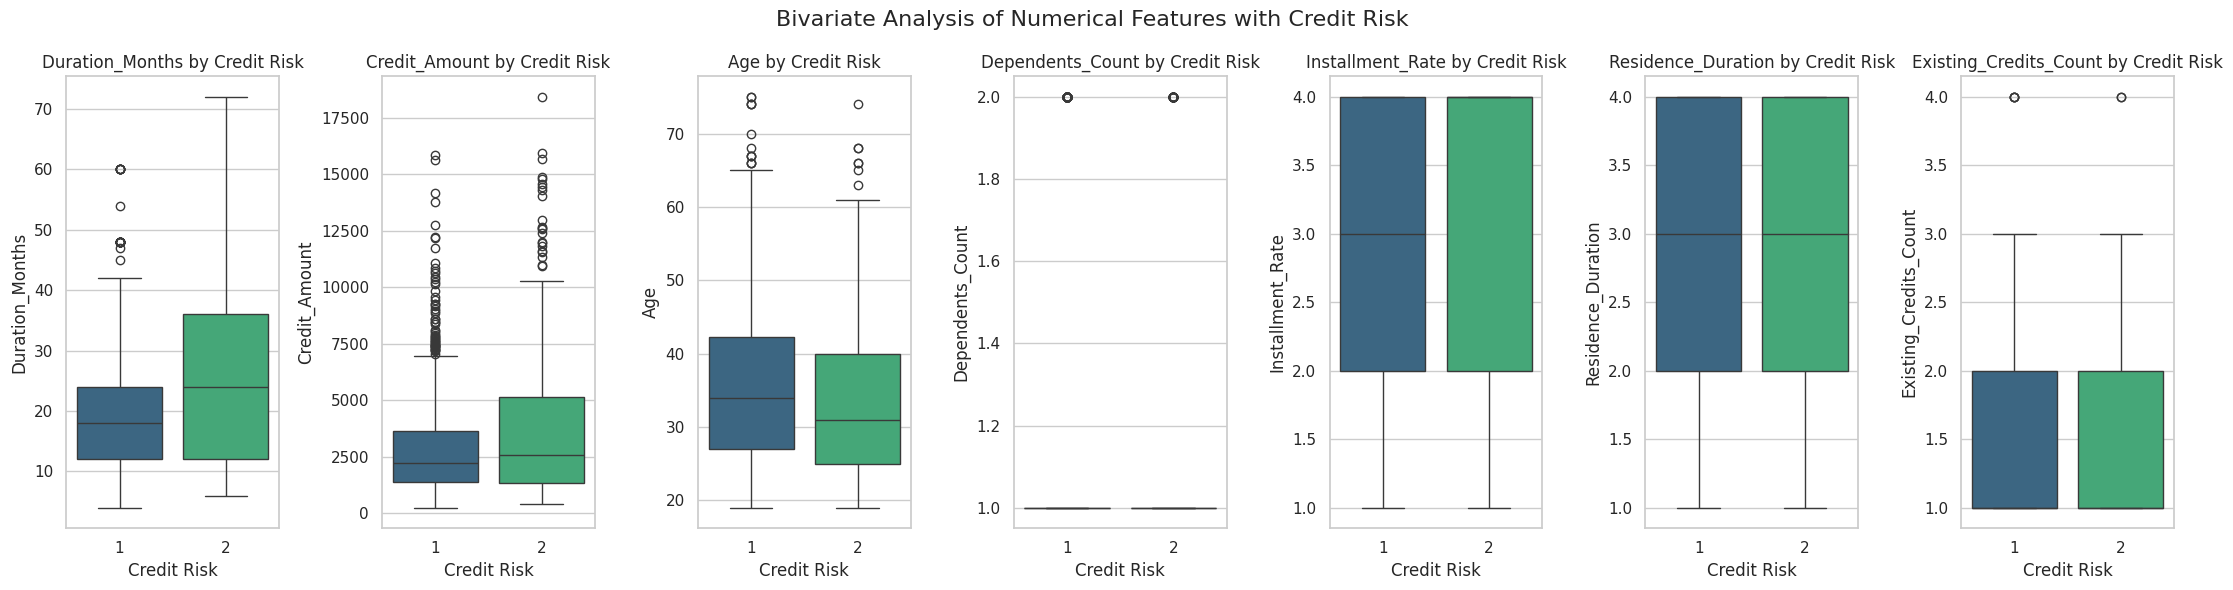

In [14]:
# List of numerical features to analyze
numerical_features = ["Duration_Months", "Credit_Amount", "Age", "Dependents_Count", "Installment_Rate", "Residence_Duration", "Existing_Credits_Count"]

data = pd.concat([data_X, data_y], axis=1)

# Set up the plotting style and layout
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(22, 6))
fig.suptitle("Bivariate Analysis of Numerical Features with Credit Risk", fontsize=16)

for i, feature in enumerate(numerical_features):
    # Plot a box plot for each numerical feature with respect to Credit_risk
    sns.boxplot(data=data, x="class", y=feature, palette="viridis", ax=axes[i])
    axes[i].set_title(f"{feature} by Credit Risk")
    axes[i].set_xlabel("Credit Risk")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


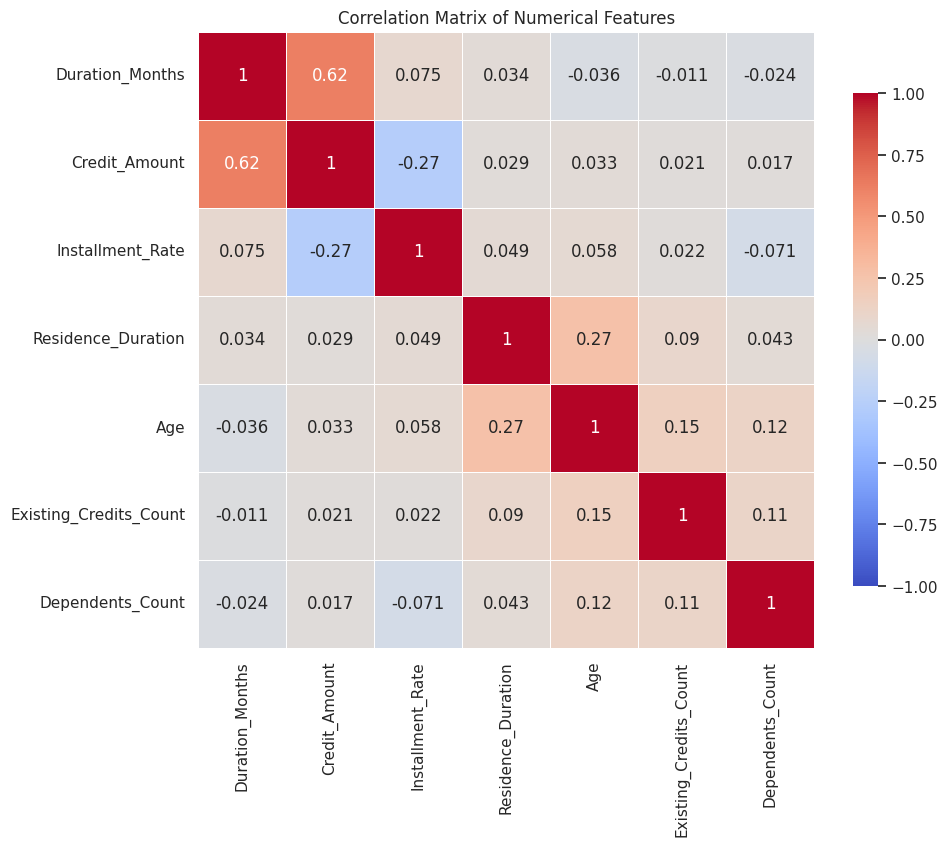

In [15]:
# Filter out numerical features only
numerical_data = data_X.select_dtypes(include=['int64'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Set up the plot size and style
plt.figure(figsize=(10, 8))
sns.set(style="white")

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Add title
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [16]:
from scipy.stats import chi2_contingency


# Ensure that data_y is a Series
if isinstance(data_y, pd.DataFrame):
    data_y = data_y.iloc[:, 0]  # Convert to Series by selecting the first column

# List of categorical features in data_X
categorical_features = data_X.select_dtypes(include=['object']).columns
chi2_results = {}

# Chi-square test for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(data_X[feature], data_y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = p

# Display results
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['p_value'])
chi2_df['Significant'] = chi2_df['p_value'] < 0.05
print("Chi-Square Test Results:")
print(chi2_df)

Chi-Square Test Results:
                              p_value  Significant
Checking_Status          1.218902e-26         True
Credit_History           1.279187e-12         True
Purpose                  1.157491e-04         True
Savings                  2.761214e-07         True
Employment_Duration      1.045452e-03         True
Personal_Status_Sex      2.223801e-02         True
Other_Debtors            3.605595e-02         True
Property                 2.858442e-05         True
Other_Installment_Plans  1.629318e-03         True
Housing                  1.116747e-04         True
Job                      5.965816e-01        False
Telephone                2.788762e-01        False
Foreign_Worker           1.583075e-02         True


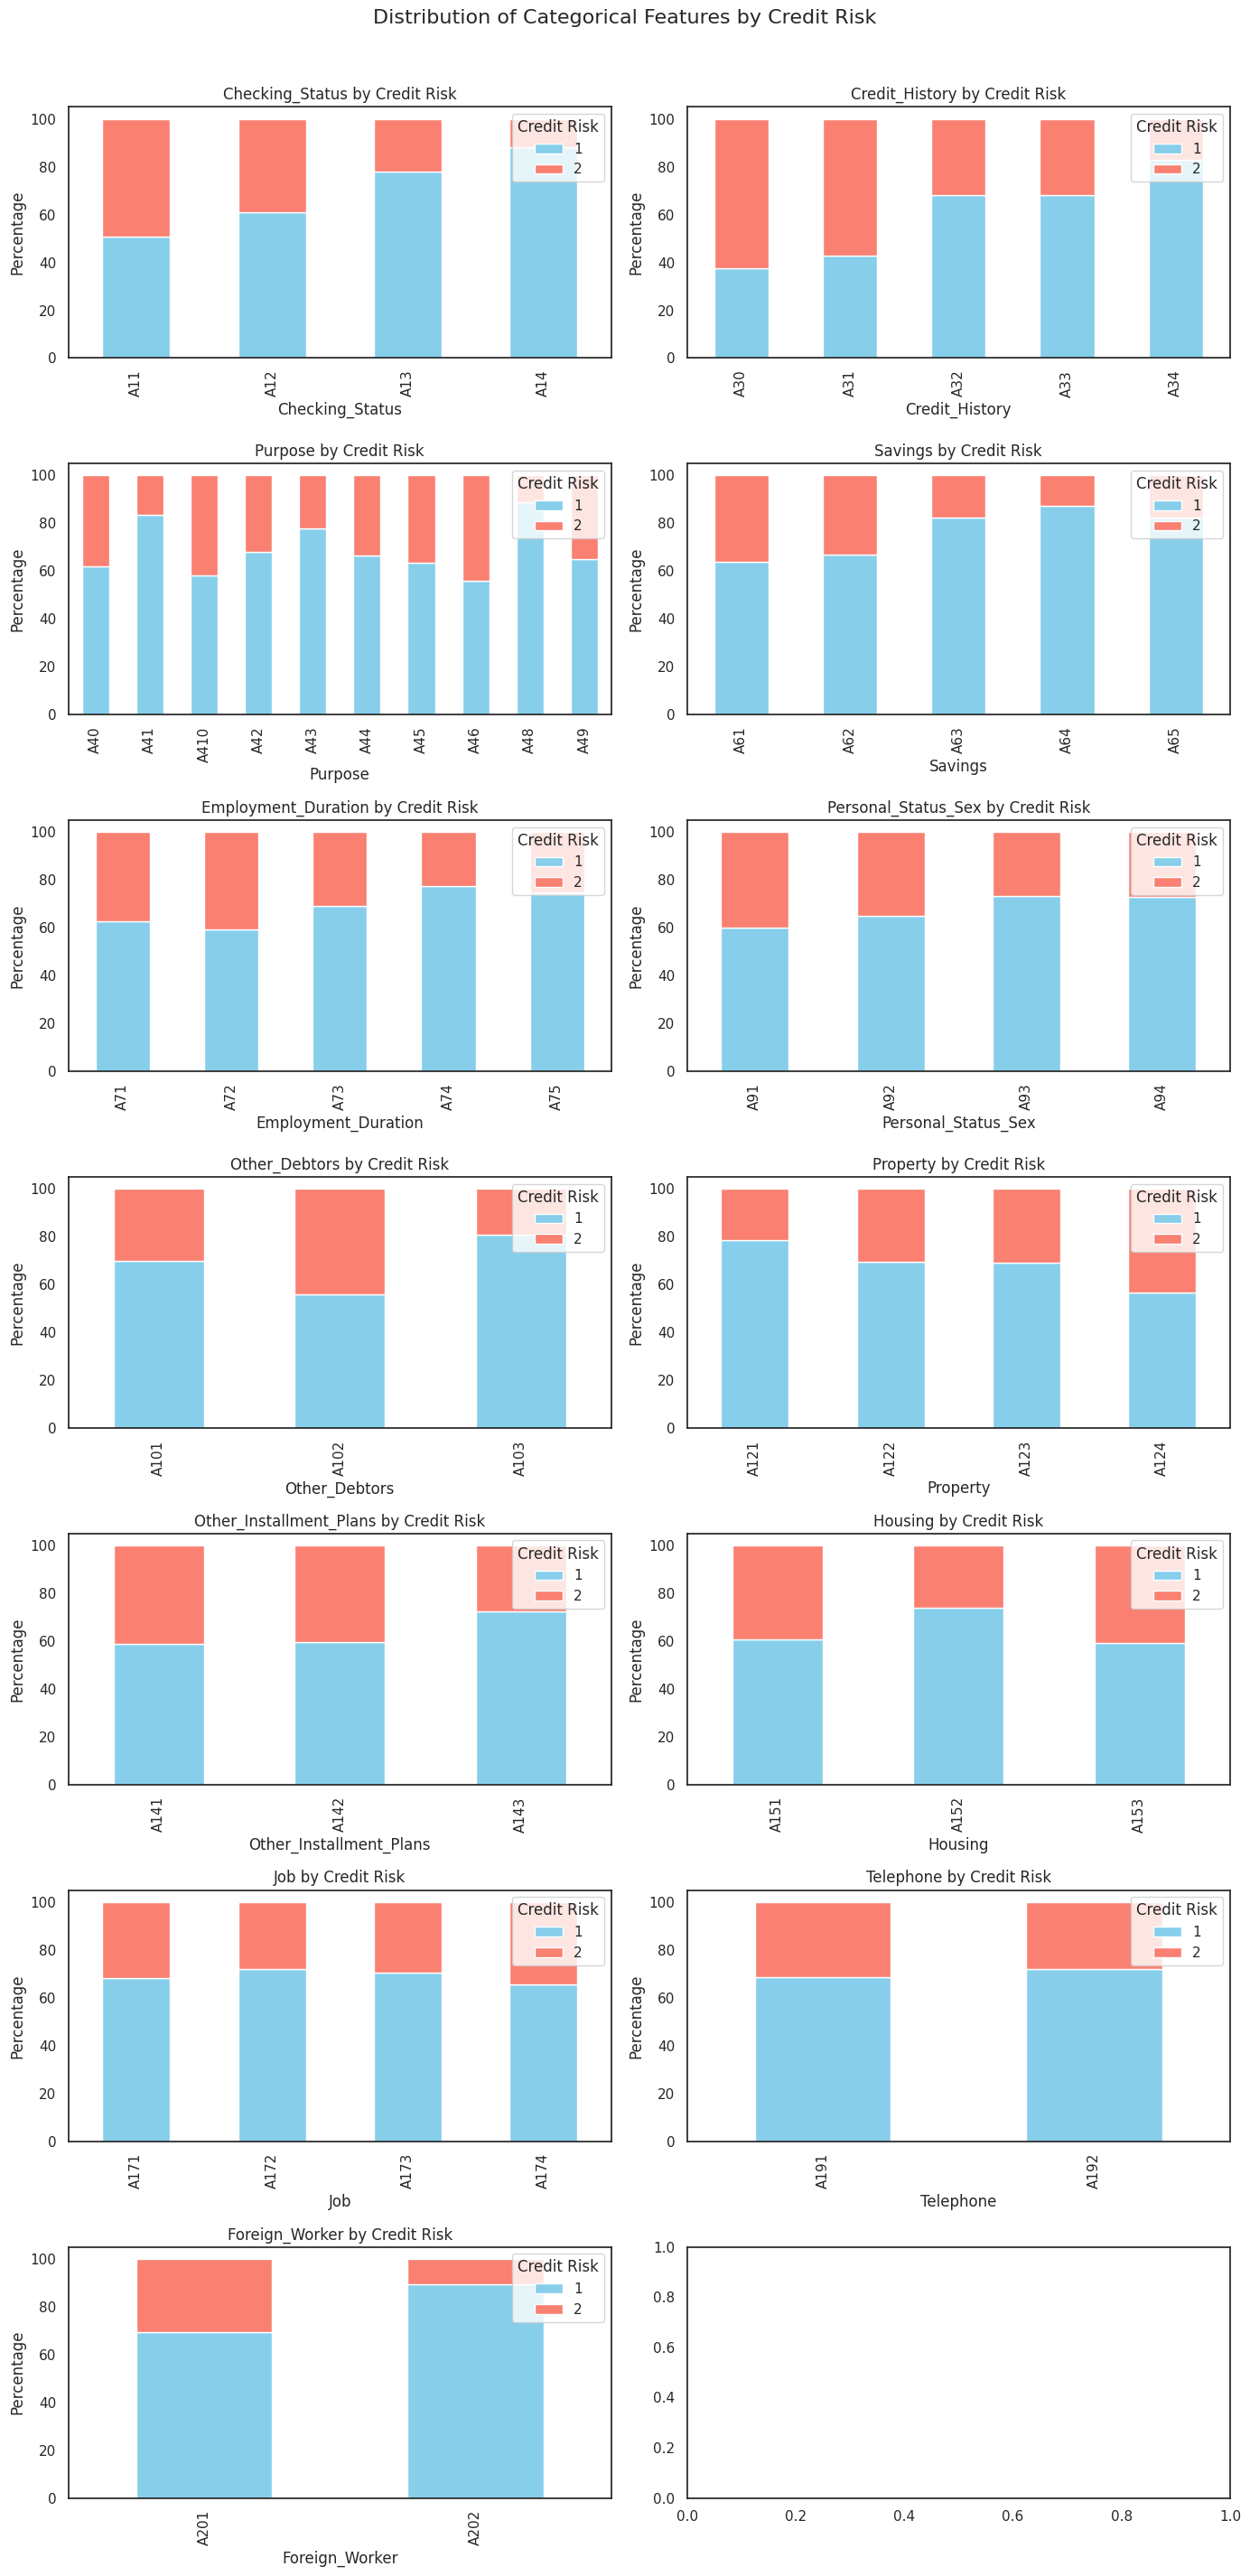

In [17]:
# Merge data_X and data_y for easier plotting
data = pd.concat([data_X, data_y.rename("Credit_risk")], axis=1)

# Plot each categorical feature
fig, axes = plt.subplots(nrows=len(categorical_features) // 2 + 1, ncols=2, figsize=(14, 30))
fig.suptitle("Distribution of Categorical Features by Credit Risk", fontsize=16)

for idx, feature in enumerate(categorical_features):
    ax = axes[idx // 2, idx % 2]
    contingency_table = pd.crosstab(data[feature], data["Credit_risk"], normalize='index') * 100
    contingency_table.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
    ax.set_title(f"{feature} by Credit Risk")
    ax.set_ylabel("Percentage")
    ax.legend(title="Credit Risk", loc="upper right")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout for title
plt.show()

In [21]:
# Calculate outliers using the IQR method for each numerical feature
outlier_summary = {}

for feature in numerical_features.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numerical_features[feature].quantile(0.25)
    Q3 = numerical_features[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = numerical_features[(numerical_features[feature] < lower_bound) | 
                                  (numerical_features[feature] > upper_bound)]
    
    # Store the count of outliers for each feature
    outlier_summary[feature] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    }

# Convert outlier summary to DataFrame for readability
outlier_summary_df = pd.DataFrame(outlier_summary).T
outlier_summary_df


AttributeError: 'list' object has no attribute 'columns'

### Feature Engineering

In [18]:
# Make a copy of data_X for feature engineering
data_fe = data_X.copy()

# 1. Binning of Numerical Features
# Binning Age into categories
data_fe['Age_group'] = pd.cut(data_fe['Age'], bins=[18, 30, 45, 60, 100], 
                              labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

# Binning Credit Amount into categories
data_fe['Credit_amount_bin'] = pd.cut(data_fe['Credit_Amount'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 2. Interaction Features
# Combining Employment_status and Credit_history
data_fe['Employment_Credit'] = data_fe['Employment_Duration'] + "_" + data_fe['Credit_History']

# 3. Encoding Categorical Variables
# Apply one-hot encoding to categorical variables
data_fe = pd.get_dummies(data_fe, columns=['Purpose', 'Housing', 'Job', 'Employment_Credit'], drop_first=True)

# Display the first few rows of the engineered dataset
data_fe.head()


,Checking_Status,Duration_Months,Credit_History,Credit_Amount,Savings,Employment_Duration,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Duration,...,Employment_Credit_A74_A30,Employment_Credit_A74_A31,Employment_Credit_A74_A32,Employment_Credit_A74_A33,Employment_Credit_A74_A34,Employment_Credit_A75_A30,Employment_Credit_A75_A31,Employment_Credit_A75_A32,Employment_Credit_A75_A33,Employment_Credit_A75_A34
0,A11,6,A34,1169,A65,A75,4,A93,A101,4,...,False,False,False,False,False,False,False,False,False,True
1,A12,48,A32,5951,A61,A73,2,A92,A101,2,...,False,False,False,False,False,False,False,False,False,False
2,A14,12,A34,2096,A61,A74,2,A93,A101,3,...,False,False,False,False,True,False,False,False,False,False
3,A11,42,A32,7882,A61,A74,2,A93,A103,4,...,False,False,True,False,False,False,False,False,False,False
4,A11,24,A33,4870,A61,A73,3,A93,A101,4,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_fe  # Engineered features
y = data_y  # Target variable (Credit_risk)

# Split data into training and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after balancing
print("Class distribution after SMOTE:")
print(y_train_balanced.value_counts())


ValueError: could not convert string to float: 'A12'

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Assuming data_y is already defined as the target variable and data_fe as the engineered features
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_fe, data_y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
